In [2]:
import pandas as pd 

In [3]:
df=pd.read_csv(r'C:\Users\pc\Downloads\Titanic-Dataset.csv',usecols=['Pclass','Survived','Age','Fare'])

In [4]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare'], dtype='object')

In [5]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna(df['Age'].median,inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_17376\641257705.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<bound method Series.median of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Age'].fillna(df['Age'].median,inplace=True)


In [8]:
##### Standardisation we use standard scar for Sklearn library 

In [9]:
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # ✅ Create an object of the class
df_scaled = scaler.fit_transform(df)


In [11]:
type(df)


pandas.core.frame.DataFrame

In [12]:
df.dtypes


Survived      int64
Pclass        int64
Age          object
Fare        float64
dtype: object

In [15]:
import pandas as pd

# 1. Force convert to numeric (invalid stuff becomes NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# 2. Check if any NaNs are present (optional)
print("Missing values in Age:", df['Age'].isna().sum())

# 3. Fill NaNs with mean or median
df['Age'] = df['Age'].fillna(df['Age'].mean())

# 4. Finally, convert to int safely
df['Age'] = df['Age'].astype(int)


Missing values in Age: 177


In [16]:
df.dtypes


Survived      int64
Pclass        int64
Age           int32
Fare        float64
dtype: object

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [21]:
df_scaled

array([[-0.78927234,  0.82737724, -0.58004441, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.65011226,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.27250525, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.04185087, -0.17626324],
       [ 1.2669898 , -1.56610693, -0.27250525, -0.04438104],
       [-0.78927234,  0.82737724,  0.18880351, -0.49237783]])

In [23]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

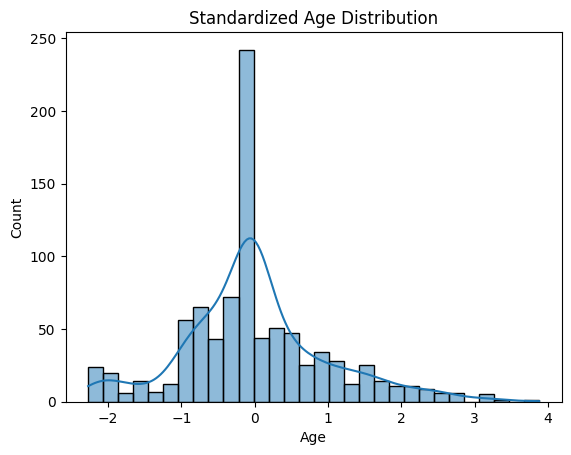

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_scaled['Age'], kde=True)
plt.title("Standardized Age Distribution")
plt.show()


In [25]:
### Min max scaling (### CNN)--- Deep learning technique 

Min MAx scales  the values between 0 to 1 . x_scaled = (x-xmin/xmax-xmin)

In [29]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()  # ✅ Use MinMaxScaler here
df_min_max = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)

print(df_min_max.head())


   Survived  Pclass     Age      Fare
0       0.0     1.0  0.2750  0.014151
1       1.0     0.0  0.4750  0.139136
2       1.0     1.0  0.3250  0.015469
3       1.0     0.0  0.4375  0.103644
4       0.0     1.0  0.4375  0.015713


In [30]:
df_min_max

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.2750,0.014151
1,1.0,0.0,0.4750,0.139136
2,1.0,1.0,0.3250,0.015469
3,1.0,0.0,0.4375,0.103644
4,0.0,1.0,0.4375,0.015713
...,...,...,...,...
886,0.0,0.5,0.3375,0.025374
887,1.0,0.0,0.2375,0.058556
888,0.0,1.0,0.3625,0.045771
889,1.0,0.0,0.3250,0.058556


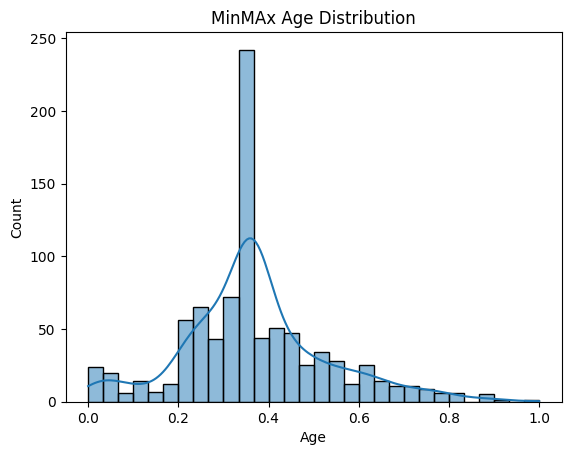

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_min_max['Age'], kde=True)
plt.title("MinMAx Age Distribution")
plt.show()


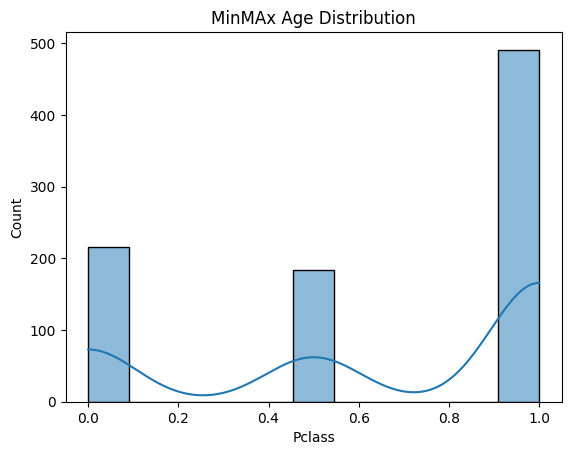

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_min_max['Pclass'], kde=True)
plt.title("MinMAx Age Distribution")
plt.show()


### Robust scaler
 RobustScaler is a data preprocessing technique in machine learning
that scales features using statistics that are robust to outliers. 
It removes the median and scales the data according to the interquartile range (IQR), 
making it less sensitive to extreme values compared to standard normalization methods.

In [36]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [37]:
df_robust

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.538462,-0.312011
1,1.0,-2.0,0.692308,2.461242
2,1.0,0.0,-0.230769,-0.282777
3,1.0,-2.0,0.461538,1.673732
4,0.0,0.0,0.461538,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.153846,-0.062981
887,1.0,-2.0,-0.769231,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.230769,0.673281


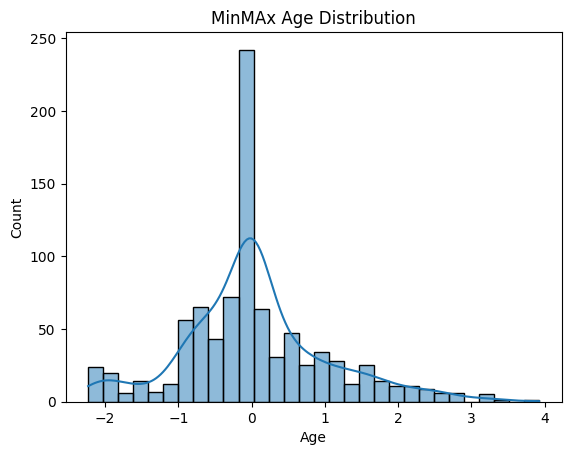

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_robust['Age'], kde=True)
plt.title("MinMAx Age Distribution")
plt.show()
